In [46]:
# Student Name: Tony Yang
# Student Number: 1003289229
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Read In data
data = pd.read_csv('INF2178_A3_data.csv')

In [48]:
# Check first 5 rows data
data.head(5)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [49]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


In [50]:
# Drop totalhouseholdincome and incomeinthousands
data.drop(columns=['totalhouseholdincome', 'incomeinthousands'], inplace=True)

In [51]:
# Descriptive statistics
data.describe()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,incomegroup
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584,1.895165
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457,0.822692
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000,1.000000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000,1.000000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000,2.000000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000,3.000000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000,3.000000


In [52]:
# Check Null values
data.isnull().sum()

fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
incomegroup                    0
dtype: int64

**Exploratory Data Analysis (EDA)**

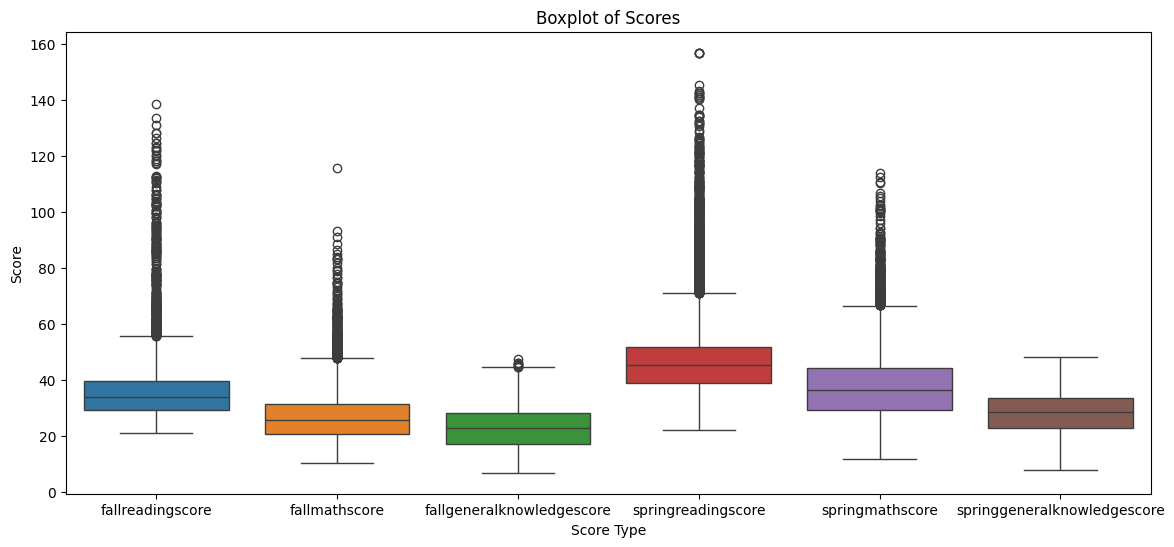

In [53]:
# Boxplot for all scores
plt.figure(figsize=(14, 6))
sns.boxplot(data=data[['fallreadingscore','fallmathscore','fallgeneralknowledgescore','springreadingscore','springmathscore','springgeneralknowledgescore']])
plt.title('Boxplot of Scores')
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.show()

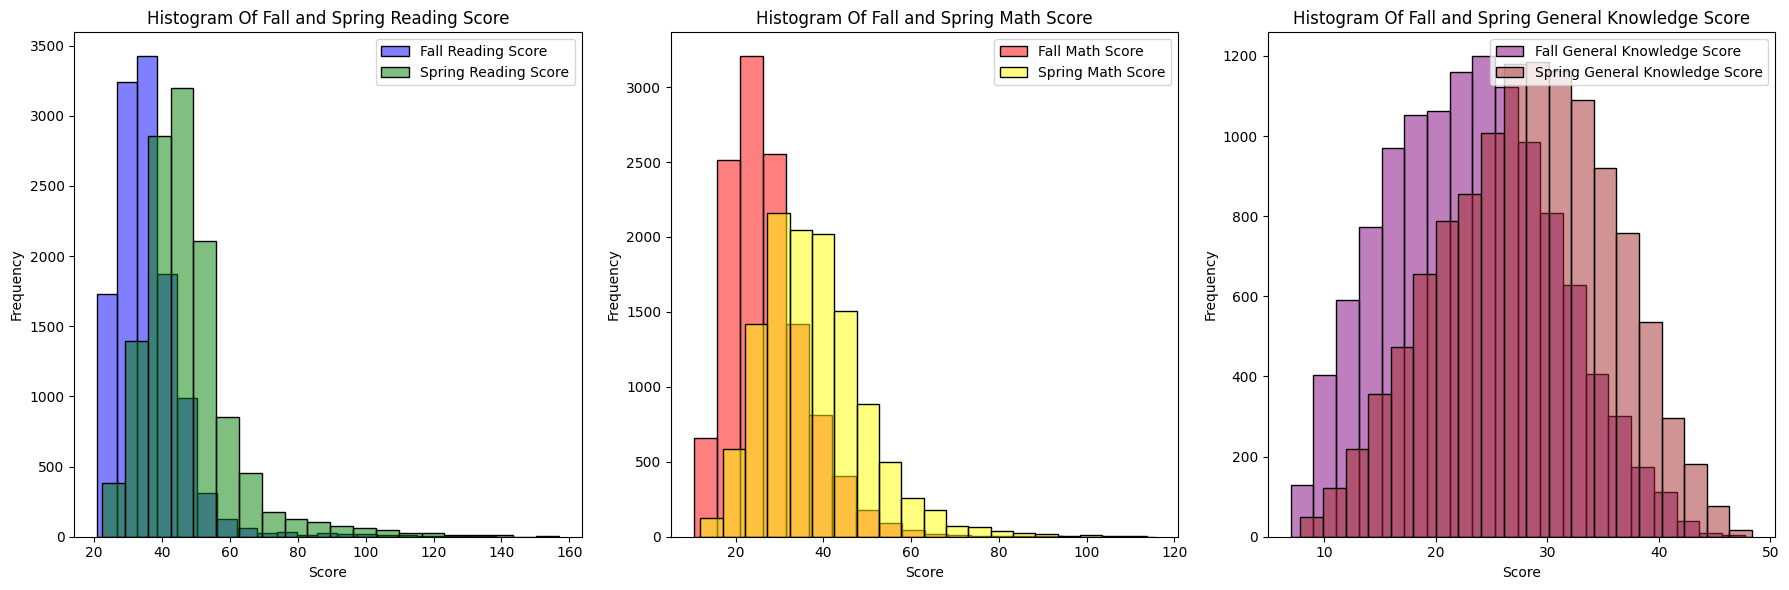

In [54]:
# Plot setup
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Histogram Plot fall and spring reading scores
sns.histplot(data=data["fallreadingscore"], bins=20, color="blue", alpha=0.5,ax=axes[0])
sns.histplot(data=data["springreadingscore"], bins=20, color='green', alpha=0.5, ax=axes[0])
axes[0].set_title('Histogram Of Fall and Spring Reading Score')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency')
axes[0].legend(labels=['Fall Reading Score', 'Spring Reading Score'])

# Histogram Plot fall and spring math scores
sns.histplot(data=data["fallmathscore"], bins=20, color="red", alpha=0.5, ax=axes[1])
sns.histplot(data=data["springmathscore"], bins=20, color='yellow', alpha=0.5,ax=axes[1])
axes[1].set_title('Histogram Of Fall and Spring Math Score')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Frequency')
axes[1].legend(labels=['Fall Math Score', 'Spring Math Score'])

# Histogram Plot fall and spring general knowledge scores
sns.histplot(data=data["fallgeneralknowledgescore"], bins=20, color="purple", alpha=0.5, ax=axes[2])
sns.histplot(data=data["springgeneralknowledgescore"], bins=20, color='brown', alpha=0.5, ax=axes[2])
axes[2].set_title('Histogram Of Fall and Spring General Knowledge Score')
axes[2].set_xlabel('Score')
axes[2].set_ylabel('Frequency')
axes[2].legend(labels=['Fall General Knowledge Score', 'Spring General Knowledge Score'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Ancova: Research Question 1**

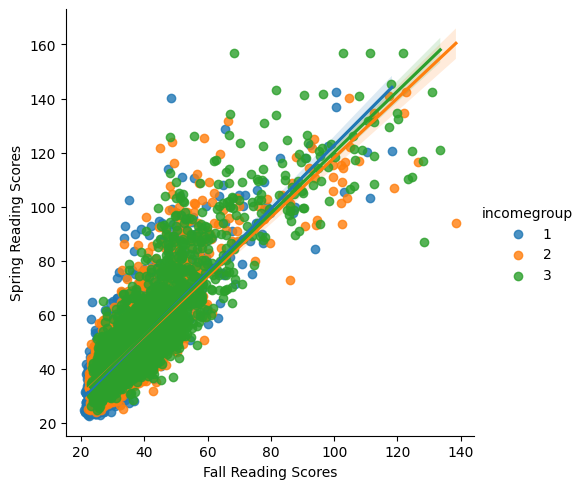

In [55]:
#  Interaction plot
sns.lmplot(x= 'fallreadingscore', y = 'springreadingscore', hue = 'incomegroup', data = data)
plt.xlabel('Fall Reading Scores')
plt.ylabel('Spring Reading Scores')
plt.show()


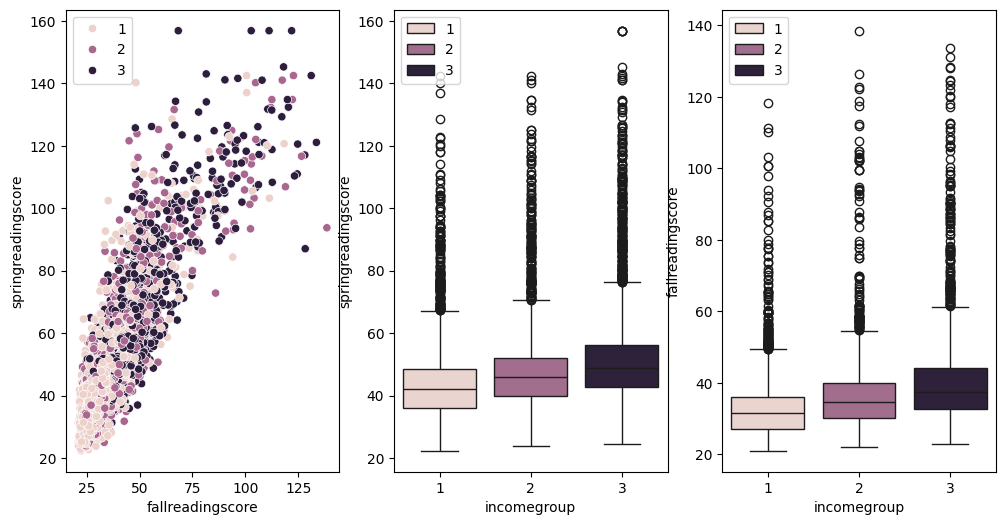

In [56]:
# Plot setup
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
sns.scatterplot(data=data, x="fallreadingscore", y="springreadingscore", hue=data.incomegroup.tolist(),ax=axes[0])
sns.boxplot(data=data, x="incomegroup", y="springreadingscore", hue=data.incomegroup.tolist(), ax=axes[1])
sns.boxplot(data=data, x="incomegroup", y="fallreadingscore", hue=data.incomegroup.tolist(), ax=axes[2])
plt.show()

In [57]:
%pip install pingouin
from pingouin import ancova
ancova_table=ancova(data=data, dv='springreadingscore', covar='fallreadingscore', between='incomegroup')
ancova_table


,Source,SS,DF,F,p-unc,np2
0,incomegroup,5.131201e+02,2,4.055660,0.017348,0.00068
1,fallreadingscore,1.547042e+06,1,24455.397576,0.000000,0.67214
2,Residual,7.546256e+05,11929,NaN,NaN,NaN


In [58]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Fit the ANCOVA model
model = ols('springreadingscore ~ fallreadingscore + incomegroup', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                 1.339e+04
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        05:38:09   Log-Likelihood:                -41675.
No. Observations:               11933   AIC:                         8.336e+04
Df Residuals:                   11930   BIC:                         8.338e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.3272      0.280  

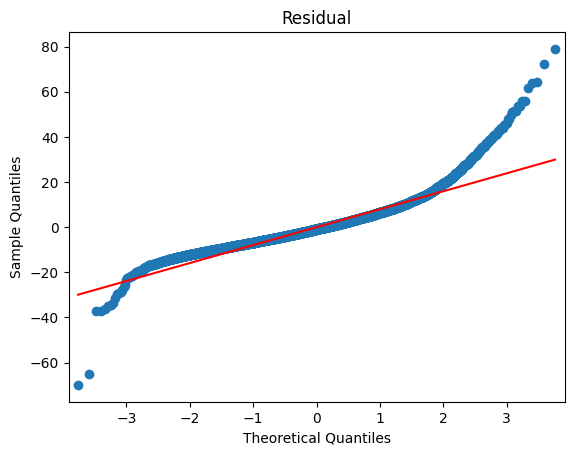

Shapiro-Wilk test statistic: 0.9120939373970032
p-value: 0.0
residuals are not normally distributed


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [59]:
# Normality of residuals: Q-Q plot and Shapiro-Wilk test
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title('Residual')
plt.show()

from scipy import stats
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk test statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

alpha = 0.05
if shapiro_test.pvalue < alpha:
    print("residuals are not normally distributed")
else:
    print("residuals are normally distributed")


In [60]:
# Homogeneity of variances: Levene's test
levene_test = stats.levene(data['springreadingscore'][data['incomegroup'] == 1],
                           data['springreadingscore'][data['incomegroup'] == 2],
                           data['springreadingscore'][data['incomegroup'] == 3])
levene_test

LeveneResult(statistic=39.5528295964788, pvalue=7.570499656193536e-18)

**Ancova: Research Question 2**

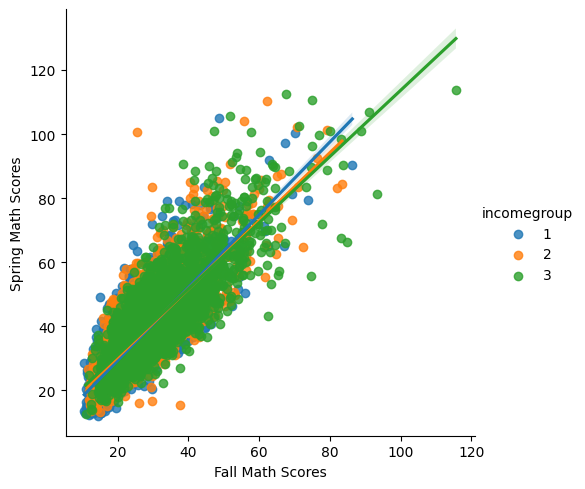

In [61]:
# Interaction Plot
sns.lmplot(x = 'fallmathscore', y = 'springmathscore', hue = 'incomegroup', data = data)
plt.xlabel('Fall Math Scores')
plt.ylabel('Spring Math Scores')
plt.show()

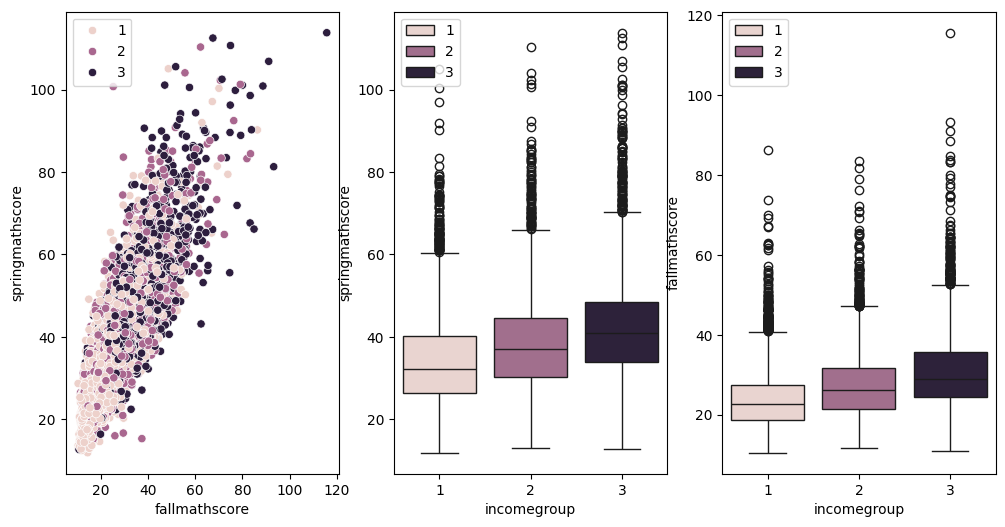

In [62]:
# Plot setup
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
sns.scatterplot(data=data, x="fallmathscore", y="springmathscore", hue=data.incomegroup.tolist(),ax=axes[0])
sns.boxplot(data=data, x="incomegroup", y="springmathscore", hue=data.incomegroup.tolist(), ax=axes[1])
sns.boxplot(data=data, x="incomegroup", y="fallmathscore", hue=data.incomegroup.tolist(), ax=axes[2])
plt.show()

In [63]:
# Ancova table
ancova(data=data, dv='springmathscore', covar='fallmathscore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1.712758e+03,2,18.523585,9.284861e-09,0.003096
1,fallmathscore,1.026489e+06,1,22203.081238,0.000000e+00,0.650505
2,Residual,5.514994e+05,11929,NaN,NaN,NaN


In [64]:
# Fit the ANCOVA model
model = ols('springmathscore ~ incomegroup + fallmathscore', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                 1.270e+04
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        05:38:17   Log-Likelihood:                -39805.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11930   BIC:                         7.964e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.7862      0.215     36.286

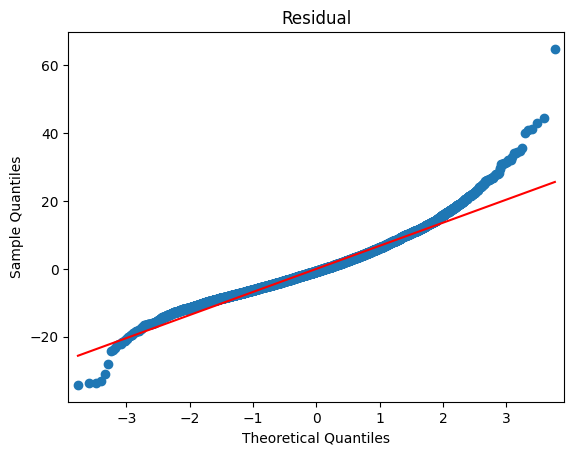

Shapiro-Wilk test statistic: 0.9649483561515808
p-value: 0.0
residuals are not normally distributed


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [65]:
# Normality of residuals: Q-Q plot and Shapiro-Wilk test
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title('Residual')
plt.show()

from scipy import stats
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk test statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

alpha = 0.05
if shapiro_test.pvalue < alpha:
    print("residuals are not normally distributed")
else:
    print("residuals are normally distributed")

In [66]:
# Homogeneity of variances: Levene's test
levene_test = stats.levene(data['springmathscore'][data['incomegroup'] == 1],
                           data['springmathscore'][data['incomegroup'] == 2],
                           data['springmathscore'][data['incomegroup'] == 3])
levene_test

LeveneResult(statistic=18.899850238111785, pvalue=6.380804527269148e-09)